# preamble

In [134]:
# science-y
#import fbprophet
import math
import numpy as np
import numpy
import numpy.polynomial as np_poly
import pandas as pd
import scipy as sp

#ml stuff
#import pandas_ml as pdml

import scipy.interpolate as sp_interpolate
import scipy.signal as sp_signal

# sklearn
import sklearn.discriminant_analysis as sk_disc
import sklearn.ensemble as sk_ensemble
import sklearn.linear_model as sk_lm
import sklearn.metrics as sk_metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing as sk_preprocess
from sklearn import svm as sk_svm
import sklearn.tree as sk_tree
from sklearn import utils as sk_utils
import sklearn.datasets as sk_datasets
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.tree import DecisionTreeClassifier

# spark stuff
try:
    from pyspark.sql import SQLContext
    from pyspark.sql import Row as SqlRow
    import pyspark.ml.classification as ml_cl
    import pyspark.ml.linalg as ml_linalg
    import pyspark.ml.regression as ml_reg
    import pyspark.ml.util as ml_util
    import pyspark.sql.functions as sql_f
    from pyspark.mllib.stat import Statistics as ml_stats
    from pyspark.ml.evaluation import RegressionEvaluator as ml_reg_eval
except ImportError:
    print('import error while loading spark, skipping')
    pass

# python stuff
import boto
from collections import OrderedDict
import copy
from datetime import datetime, timedelta
from datetime import date as dt_date
import functools as ft
from __future__ import print_function
import itertools
import json
import multiprocessing
import operator
import os
import pickle
from pprint import pprint
import re
import random
import string
import subprocess
import sys
import time
import tqdm

# viz
from graphviz import Digraph
import matplotlib.colors as mpl_colors
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as mlines
import matplotlib.dates as mdates
import mpld3
import pydotplus
import seaborn as sns

import error while loading spark, skipping


In [125]:
# widgets
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets
#from IPython.html import widgets as html_widgets
from IPython.display import display as ipython_display
# from IPython.display import Math
# from IPython.display import Latex
# from IPython.display import HTML

In [6]:
%matplotlib inline
%load_ext Cython
#mpld3.enable_notebook()

DIR_HOME = os.environ['HOME']
DIR_REPOS = DIR_HOME + "/repos"
DIR_BMLSP = DIR_REPOS + "/luispedro/BuildingMachineLearningSystemsWithPython"
DIR_OLA_DATA = DIR_HOME + "/ola-data"
fo_data = DIR_OLA_DATA + "/driver-churn/qubole"

In [7]:
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams["figure.figsize"] = [6,4]

np.set_printoptions(precision=2)

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('precision', 2)
pd.set_option('max_colwidth',20)

In [8]:
print(sys.version_info)
print(sys.version)

sys.version_info(major=3, minor=6, micro=1, releaselevel='final', serial=0)
3.6.1 (default, Apr  4 2017, 09:36:47) 
[GCC 4.2.1 Compatible Apple LLVM 7.0.2 (clang-700.1.81)]


In [9]:
if 'sc' in locals():
    sc.setLogLevel("WARN")

initialization
$
\newcommand{\Brace}[1]{\left\{#1\right\}}
\newcommand{\Bracket}[1]{\left[#1\right]}
\newcommand{\cases}[1]{\begin{cases}#1\end{cases}}
\newcommand{\Ceil}[1]{\left\lceil {#1} \right\rceil}
\newcommand{\cov}[1]{\text{cov} \sigma\left[#1\right]}
\newcommand{\diff}[2]{\frac{d #1}{d #2}}
\newcommand{\difftwo}[2]{\frac{d^2 #1}{d {#2}^2}}
\newcommand{\diffn}[2]{{#1}^{\prime}(#2)}
\newcommand{\ds}{\displaystyle}
\newcommand{\E}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\expb}[1]{\exp\left\{#1\right\}} 
\newcommand{\EXP}[1]{\exp\left\{#1\right\}} 
\newcommand{\frachalf}[1]{\frac{#1}{2}~}
\newcommand{\fracone}[1]{\frac{1}{#1}~}
\newcommand{\fracrec}[1]{\frac{1}{#1}~}
\newcommand{\Floor}[1]{\left\lfloor {#1} \right\rfloor}
\newcommand{\half}{\fracone{2}}
\newcommand{\H}[1]{\mathbb{H}\left[#1\right]}
\newcommand{\Int}[2]{\displaystyle \int_{#1}^{#2}~}
\newcommand{\intinfinf}{\Int{-\infty}{\infty}}
\newcommand{\inv}[1]{#1^{-1}}
\newcommand{\invp}[1]{\left({#1}\right)^{-1}}
\newcommand{\KL}[2]{\text{KL}\left(#1 \Vert #2\right)}
\newcommand{\Lim}[1]{\displaystyle \lim_{#1}}
\newcommand{\Ln}[1]{\ln \left\(#1\right\)}
\newcommand{\Lnb}[1]{\ln \left\{#1\right\} }
\newcommand{\Mod}[1]{\left|#1\right|}
\newcommand{\Norm}[1]{\left\lVert #1 \right\rVert}
\newcommand{\Normsqr}[1]{\Norm{#1}^2}
\newcommand{\map}[1]{#1_{\text{MAP}}}
\newcommand{\ml}[1]{#1_{\text{ML}}}
\newcommand{\MI}[1]{\mathcal{I}\left(#1\right)}
\newcommand{\P}{\mathbb{P}}
\newcommand{\Paran}[1]{\left(#1\right)}
\newcommand{\Partial}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\Recip}[1]{ \frac{1}{ #1 } }
\newcommand{\sqrbrkt}[1]{\Bracket{#1}^2}
\newcommand{\sqrbrc}[1]{\Brace{#1}^2}
\newcommand{\trace}[1]{\text{Tr}\left( #1 \right)}
\newcommand{\traceb}[1]{\text{Tr}\left\{#1\right\}}
\newcommand{\underl}[1]{\text{$\underline{#1}$}}
\newcommand{\V}[1]{\mathbb{V}\left[#1\right]}
$
$
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}
$
$
\newcommand{\mat}[1]{ \left[ \begin{matrix} #1 \end{matrix} \right] }
\newcommand{\matp}[1]{ \left( \begin{matrix} #1 \end{matrix} \right)}
\newcommand{\mats}[1]{ \begin{matrix}#1\end{matrix} }
\newcommand{\arrthree}[1]{
\begin{array}{rlr} #1 \end{array}}
$

$
\newcommand{\C}{\mathbb{C}}
\newcommand{\Ca}{\mathcal{C}}
\newcommand{\Caone}{\Ca_1}
\newcommand{\Catwo}{\Ca_2}
\newcommand{\Cak}{\Ca_k}
\newcommand{\D}{\mathcal{D}}
\newcommand{\G}{\mathcal{G}}
\newcommand{\I}{\mathcal{I}}
\newcommand{\L}{\mathcal{L}}
\newcommand{\M}{\mathcal{M}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\Ra}{\mathcal{R}}
$
$
\newcommand{\commentgray}[1]{\color{gray}{\text{#1}}}
$

sum, product
$
\newcommand{\sumi}{\displaystyle \sum_i}
\newcommand{\sumiD}{\displaystyle \sum_{i=1}^{D}}
\newcommand{\sumiL}{\displaystyle \sum_{i=1}^{L}}
\newcommand{\sumiN}{\displaystyle \sum_{i=1}^{N}}
\newcommand{\sumjD}{\displaystyle \sum_{j=1}^{D}}
\newcommand{\sumjK}{\displaystyle \sum_{j=1}^{K}}
\newcommand{\sumjMl}{\sum_{j=1}^{M-1}}
\newcommand{\sumkK}{\displaystyle \sum_{k=1}^{K}}
\newcommand{\sumkM}{\displaystyle \sum_{k=1}^{M}}
\newcommand{\sumkMl}{\sum_{k=1}^{M-1}}
\newcommand{\sumkp}{\displaystyle \sum_{k=1}^{p}}
\newcommand{\summN}{\displaystyle \sum_{m=1}^{N}}
\newcommand{\sumnN}{\displaystyle \sum_{n=1}^{N}}
$
$
\newcommand{\prodi}{\displaystyle \prod_i}
\newcommand{\prodiD}{\displaystyle \prod_{i=1}^{D}}
\newcommand{\prodiL}{\displaystyle \prod_{i=1}^{L}}
\newcommand{\prodiN}{\displaystyle \prod_{i=1}^{N}}
\newcommand{\prodjK}{\displaystyle \prod_{j=1}^{K}}
\newcommand{\prodkK}{\displaystyle \prod_{k=1}^{K}}
\newcommand{\prodmN}{\displaystyle \prod_{m=1}^{N}}
\newcommand{\prodnN}{\displaystyle \prod_{n=1}^{N}}
$

alphabet shortcuts
$
\newcommand{\ab}{\mathbf{a}}
\newcommand{\at}{\ab^T}
\newcommand{\Ab}{\mathbf{A}}
\newcommand{\At}{\Ab^T}
\newcommand{\Ai}{\inv{\Ab}}
\newcommand{\Abjk}{\Ab_{jk}}
\newcommand{\bb}{\mathbf{b}}
\newcommand{\bt}{\bb^T}
\newcommand{\Bb}{\mathbf{B}}
\newcommand{\Bt}{\Bb^T}
\newcommand{\Cb}{\mathbf{C}}
\newcommand{\Cn}{\Cb_{N}}
\newcommand{\Db}{\mathbf{D}}
\newcommand{\fb}{\mathbf{f}}
\newcommand{\fp}{f^{\prime}}
\newcommand{\Hb}{\mathbf{H}}
\newcommand{\hx}{h(\xb)}
\newcommand{\Jb}{\mathbf{J}}
\newcommand{\kb}{\mathbf{k}}
\newcommand{\kt}{\kb^T}
\newcommand{\Kb}{\mathbf{K}}
\newcommand{\Lb}{\mathbf{L}}
\newcommand{\Lt}{\Lb^T}
\newcommand{\Lbi}{\Lb^{-1}}
\newcommand{\mb}{\mathbf{m}}
\newcommand{\mt}{\mb^T}
\newcommand{\mbn}{\mb_N}
\newcommand{\mbnt}{\mbn^T}
\newcommand{\mbN}{\mb_N}
\newcommand{\mbNt}{\mbn^T}
\newcommand{\Mb}{\mathbf{M}}
\newcommand{\Qb}{\mathbf{Q}}
\newcommand{\Rb}{\mathbf{R}}
\newcommand{\sb}{\mathbf{s}}
\newcommand{\Sb}{\mathbf{S}}
\newcommand{\tb}{\mathbf{t}}
\newcommand{\tbnn}{\tb_{N}}
\newcommand{\tbnp}{\tb_{N+1}}
\newcommand{\tt}{\tb^T}
\newcommand{\Tb}{\mathbf{T}}
\newcommand{\Tt}{\Tb^T}
\newcommand{\ub}{\mathbf{u}}
\newcommand{\Ub}{\mathbf{U}}
\newcommand{\Ut}{\Ub^T}
\newcommand{\vb}{\mathbf{v}}
\newcommand{\Vb}{\mathbf{V}}
\newcommand{\wb}{\mathbf{w}}
\newcommand{\wnr}[1]{\wb^{(\text{#1})}}
\newcommand{\wt}{\wb^T}
\newcommand{\Wb}{\mathbf{W}}
\newcommand{\Wt}{\Wb^T}
\newcommand{\Wtilde}{\widetilde{\Wb}}
\newcommand{\Wtildet}{\Wtilde^T}
\newcommand{\Xb}{\mathbf{X}}
\newcommand{\Xt}{\Xb^T}
\newcommand{\Xk}{\Xb_k}
\newcommand{\Xkt}{\Xk^T}
\newcommand{\Xtilde}{\widetilde{\Xb}}
\newcommand{\Xtildet}{\Xtilde^T}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xt}{\xb^T}
\newcommand{\xtilde}{\widetilde{\xb}}
\newcommand{\xtilden}{\xtilde_n}
\newcommand{\xtildent}{\xtilden^T}
\newcommand{\xp}{x^{\prime}}
\newcommand{\xbp}{\xb^{\prime}}
\newcommand{\xbm}{\xb_m}
\newcommand{\xbn}{\xb_n}
\newcommand{\xbnp}{\xb_{N+1}}
\newcommand{\xab}{\mathbf{x_a}}
\newcommand{\xabt}{\mathbf{x_a}^T}
\newcommand{\xbb}{\mathbf{x_b}}
\newcommand{\xbbt}{\mathbf{x_b}^T}
\newcommand{\yb}{\mathbf{y}}
\newcommand{\yt}{\yb^T}
\newcommand{\yx}{y(\xb)}
\newcommand{\Yb}{\mathbf{Y}}
\newcommand{\Yt}{\Yb^T}
\newcommand{\zb}{\mathbf{z}}
\newcommand{\zt}{\zb^T}
\newcommand{\zbm}{\zb_m}
\newcommand{\zbn}{\zb_n}
\newcommand{\zbnp}{\zb_{n-1}}
\newcommand{\znk}{\zb_{nk}}
\newcommand{\znpj}{\zb_{n-1,j}}
\newcommand{\Zb}{\mathbf{Z}}
$

math shortcuts
$
\newcommand{\alphab}{\pmb{\alpha}}
\newcommand{\alphabt}{\alphab^T}
\newcommand{\betab}{\pmb{\beta}}
\newcommand{\betabp}{\betab^{\prime}}
\newcommand{\chib}{\boldsymbol{\chi}}
\newcommand{\etab}{\pmb{\eta}}
\newcommand{\etabp}{\etab^{\prime}}
\newcommand{\etat}{\eta^T}
\newcommand{\etabt}{\etab^T}
\newcommand{\Lambdab}{\pmb{\Lambda}}
\newcommand{\laa}{\Lambda_{aa}}
\newcommand{\laai}{\Lambda_{aa}^{-1}}
\newcommand{\lab}{\Lambda_{ab}}
\newcommand{\lba}{\Lambda_{ba}}
\newcommand{\lbb}{\Lambda_{bb}}
\newcommand{\lbbi}{\Lambda_{bb}^{-1}}
\newcommand{\li}{\Lambda^{-1}}
\newcommand{\Li}{\Lambda^{-1}}
\newcommand{\mub}{\pmb{\mu}}
\newcommand{\mut}{\mub^T}
\newcommand{\muab}{\pmb{\mu}_a}
\newcommand{\mubb}{\pmb{\mu}_b}
\newcommand{\Phib}{\pmb{\Phi}}
\newcommand{\Phibt}{\Phib^T}
\newcommand{\pib}{\pmb{\pi}}
\newcommand{\sigmasqr}{\sigma^2}
\newcommand{\saa}{\Sigma_{aa}}
\newcommand{\sab}{\Sigma_{ab}}
\newcommand{\sba}{\Sigma_{ba}}
\newcommand{\sbb}{\Sigma_{bb}}
\newcommand{\Sigmai}{\inv{\Sigma}}
\newcommand{\thetab}{\pmb{\theta}}
\newcommand{\thetat}{\thetab^T}
\newcommand{\thetabh}{\hat{\thetab}}
\newcommand{\thetaold}{\thetab^{\text{old}}}
$
$
\newcommand{\zerob}{\pmb{0}}
\newcommand{\oneb}{\pmb{1}}
\newcommand{\ed}{\mathbb{E}_{\D}}
\newcommand{\edyx}{\ed\left[y(\xb ; \D)\right]}
\newcommand{\dx}{~dx}
\newcommand{\dxb}{~d\xb}
\newcommand{\pxdxb}{p(\xb) \dxb}
\newcommand{\dwb}{~d\wb}
$

aliases for distributions
$\newcommand{\multivarcoeff}{\frac{1}{(2\pi)^{D/2}}
\frac{1}{\left| \mathbf{\Sigma}\right|^{1/2}}}$
$\newcommand{\multivarexp}[2]
{
\left\{
 -\frac{1}{2} 
 {#1}^T 
 #2
 {#1}
\right\}
}$
$\newcommand{\multivarexpx}[1]{\multivarexp{#1}{\Sigma^{-1}}}$
$\newcommand{\multivarexpstd}{\multivarexpx{(\xb-\mub)}}$
$\newcommand{\gam}{\operatorname{Gam}}$
$
\newcommand{\Nl}[3]{\mathcal{N}\left(#1 \mid #2, #3\right)}
\newcommand{\Nstdx}{\Nl{\mathbf{x}}{\mathbf{\mu}}{\Sigma}}
$

In [ ]:
HTML("<style>"\
    "div.cell{"\
        "width:50%;"\
        "margin-left:25%;"\
        "margin-right:auto;"\
    "}"\
"</style>")

# defs

In [65]:
def get_stump_str(t, feat_cols_, labels_, root=0, depth=1, feat_str_width=16):
    left_child = t.children_left[0]
    right_child = t.children_right[0]
    l_vals, r_vals = t.value[left_child].ravel(), t.value[right_child].ravel()
    return ('if %16s[%2d] <= %6.2f: {%7s [%.2f %.2f]} else: {%7s [%.2f %.2f]}' % (
        feat_cols_[t.feature[0]], t.feature[0], t.threshold[0], 
        labels_[np.argmax(t.value[left_child])], l_vals[0], l_vals[1],
        labels_[np.argmax(t.value[right_child])],r_vals[0], r_vals[1],
    ))

#print(get_stump_str(tmp_dtc.tree_, mdl_ab.data.feat_cols, ['present','absent']))

def print_abc(mdl_abc_, feat_cols=None,labels=['present','absent']):
    feat_cols_ = feat_cols
    if type(mdl_abc_) is Model:
        feat_cols_ = mdl_abc_.data.feat_cols
        abc_best = mdl_abc_.grid_search_cv.best_estimator_
    else:
        if feat_cols is None:
            raise Exception('feat cols null of non Model Object')
        abc_best_ = mdl_abc_
    
    estimators_, weights_ = abc_best_.estimators_, abc_best_.estimator_weights_
    errors_ = abc_best_.estimator_errors_
    # hack for samme.r
    # weights_ = np.log((1-errors_)/errors_)
    for wt_, est_,err_ in zip(weights_,estimators_,errors_):
        str1_ = get_stump_str(est_.tree_, feat_cols_, labels)
        print('[e:%.2f, w:%.2f]: %s' % (err_,wt_,str1_))

# core

In [13]:
# Construct dataset
X1, y1 = sk_datasets.make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = sk_datasets.make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

In [16]:
bdt = sk_ensemble.AdaBoostClassifier(sk_tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=200)

bdt.fit(X, y)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

In [25]:
sns.color_palette?

In [28]:
plt.cm.Paired?

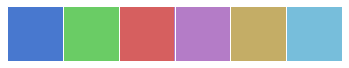

In [29]:
sns.palplot(sns.color_palette("muted"))
mpl_colors.ListedColormap(sns.color_palette("muted"))

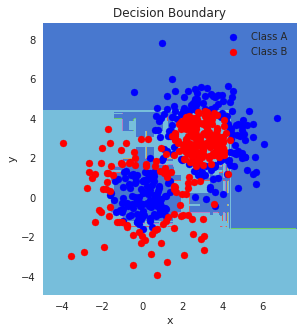

In [30]:
plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=mpl_colors.ListedColormap(sns.color_palette("muted")))
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

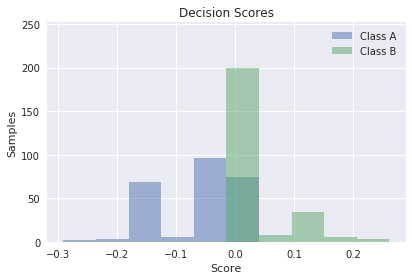

In [23]:
# Plot the two-class decision scores
plt.rcParams['figure.figsize'] = [12,4]
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             label='Class %s' % n,
             alpha=.5)
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()

In [64]:
bdt_est_0 = bdt.estimators_[0]
bdt_est_0

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1199425558, splitter='best')

In [82]:
X[:,1]

(500, 2)

In [94]:
np.concatenate((bdt_est_0.tree_.predict(bdt_est_0._validate_X_predict(X, check_input=True)), X),axis=1)

array([[ 0.4 ,  0.5 ,  0.7 , -0.25],
       [ 0.4 ,  0.5 , -3.95,  2.74],
       [ 0.4 ,  0.5 ,  0.15, -2.16],
       ..., 
       [ 0.4 ,  0.5 ,  0.89,  3.07],
       [ 0.4 ,  0.5 ,  0.85,  3.88],
       [ 0.4 ,  0.5 ,  5.22,  1.4 ]])

In [100]:
def predict_proba_dt(self, X, check_input=True):
    X = self._validate_X_predict(X, check_input)
    # returns the leaf node distribution of classes
    proba = self.tree_.predict(X)

    print('self.n_outputs_',self.n_outputs_)
    if self.n_outputs_ == 1:
        # normlize so that the sum along rows == 1
        proba = proba[:, :self.n_classes_]
        normalizer = proba.sum(axis=1)[:, np.newaxis]
        normalizer[normalizer == 0.0] = 1.0
        proba /= normalizer

        return proba

    else:
        all_proba = []

        for k in range(self.n_outputs_):
            proba_k = proba[:, k, :self.n_classes_[k]]
            normalizer = proba_k.sum(axis=1)[:, np.newaxis]
            normalizer[normalizer == 0.0] = 1.0
            proba_k /= normalizer
            all_proba.append(proba_k)

        return all_proba
#predict_proba_dt(bdt_est_0, X)
np.log(predict_proba_dt(bdt_est_0, X))

self.n_outputs_ 1


array([[-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.

limit_output extension: Maximum message size of 10000 exceeded with 11518 characters

In [105]:
_samme_proba(bdt_est_0,2,X)

array([[-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.8 , -0.59],
       [-0.

limit_output extension: Maximum message size of 10000 exceeded with 11500 characters

In [107]:
_samme_proba(bdt_est_0,2,X)

array([[-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.1 ,  0.1 ],
       [-0.

limit_output extension: Maximum message size of 10000 exceeded with 11500 characters

In [106]:
def _samme_proba(estimator, n_classes, X):
    proba = estimator.predict_proba(X)

    # Displace zero probabilities so the log is defined.
    # Also fix negative elements which may occur with
    # negative sample weights.
    proba[proba < np.finfo(proba.dtype).eps] = np.finfo(proba.dtype).eps
    log_proba = np.log(proba)
    #return log_proba
    return (n_classes - 1) * \
                (log_proba - 
                 (1. / n_classes) * log_proba.sum(axis=1)[:, np.newaxis]
                )

In [154]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label=<first &le; 4.3584<br/>gini = 0.5<br/>samples = 500<br/>value = [0.5, 0.5]<br/>class = absent>, fillcolor="#e5813900"] ;\n1 [label=<gini = 0.4946<br/>samples = 451<br/>value = [0.404, 0.498]<br/>class = present>, fillcolor="#399de530"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<gini = 0.04<br/>samples = 49<br/>value = [0.096, 0.002]<br/>class = absent>, fillcolor="#e58139fa"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n}'

In [155]:
graph

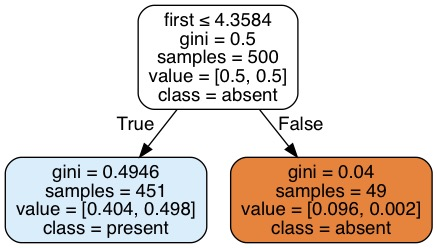

In [140]:
dot_data = sk_tree.export_graphviz(bdt_est_0, out_file=None, 
                         feature_names=['zeroth','first'],  
                         class_names=['absent','present'],  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_jpg())

In [150]:
np.average?

In [151]:
bdt._boost_real??

In [143]:
bdt.estimator_errors_

array([ 0.41,  0.33,  0.36,  0.33,  0.39,  0.41,  0.38,  0.41,  0.45,
        0.37,  0.46,  0.42,  0.41,  0.46,  0.41,  0.4 ,  0.47,  0.42,
        0.48,  0.46,  0.47,  0.43,  0.45,  0.44,  0.48,  0.47,  0.46,
        0.47,  0.46,  0.45,  0.46,  0.46,  0.49,  0.48,  0.47,  0.49,
        0.49,  0.49,  0.48,  0.46,  0.47,  0.47,  0.47,  0.47,  0.44,
        0.45,  0.46,  0.46,  0.46,  0.47,  0.47,  0.49,  0.49,  0.47,
        0.46,  0.46,  0.46,  0.46,  0.46,  0.47,  0.46,  0.47,  0.46,
        0.46,  0.46,  0.47,  0.47,  0.48,  0.47,  0.47,  0.46,  0.46,
        0.47,  0.47,  0.47,  0.47,  0.46,  0.47,  0.5 ,  0.5 ,  0.49,
        0.49,  0.49,  0.49,  0.47,  0.5 ,  0.49,  0.48,  0.47,  0.46,
        0.46,  0.46,  0.48,  0.49,  0.47,  0.47,  0.47,  0.48,  0.47,
        0.47,  0.47,  0.46,  0.46,  0.47,  0.47,  0.46,  0.47,  0.47,
        0.47,  0.47,  0.47,  0.47,  0.47,  0.47,  0.47,  0.47,  0.48,
        0.48,  0.47,  0.48,  0.48,  0.49,  0.5 ,  0.49,  0.49,  0.49,
        0.48,  0.47,

In [141]:
get_stump_str(bdt_est_0.tree_, feat_cols_=['zeroth','first'], labels_=['absent','present'])

'if            first[ 1] <=   4.36: {present [0.40 0.50]} else: { absent [0.10 0.00]}'

In [130]:
>>> from IPython.display import Image  
>>> dot_data = sk_tree.export_graphviz(bdt_est_0, out_file=None, 
                         feature_names=['zeroth','first'],  
                         class_names=['absent','present'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
>>> graph = pydotplus.graph_from_dot_data(dot_data)  
>>> ipython_display.Image(graph.create_png()) 

NameError: name 'pydotplus' is not defined

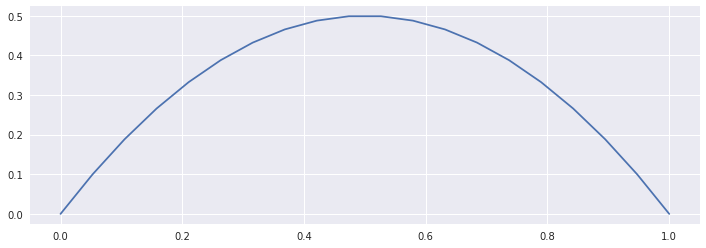

In [123]:
def plot_gini_impurity():
    prob_a_ = np.linspace(0,1,20)
    gini_impurity_ = 1 - prob_a_*prob_a_ - (1-prob_a_)*(1-prob_a_)
    plt.plot(prob_a_, gini_impurity_)
    plt.show()
plot_gini_impurity()

In [115]:
bdt_est_0.feature_importances_??

In [112]:
bdt.estimator_weights_

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [111]:
len(bdt.estimators_)

200

In [60]:
def decision_function_bdt(bdt,X):
    n_classes = bdt.n_classes_
    print('n-classes:', n_classes)
    classes = bdt.classes_[:, np.newaxis]
    pred = sum(_samme_proba(estimator, n_classes, X) for estimator in bdt.estimators_)
    pred /= bdt.estimator_weights_.sum()
    if n_classes == 2:
        pred[:, 0] *= -1
        return pred.sum(axis=1)
    return pred

In [61]:
np.all(decision_function_bdt(bdt,X) == bdt.decision_function(X))

n-classes: 2


True

In [70]:
get_stump_str(bdt_est_0.tree_, feat_cols_=['one','two'], labels_=['absent','present'])

'if              two[ 1] <=   4.36: {present [0.40 0.50]} else: { absent [0.10 0.00]}'